# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set = df_train.iloc[:, 1:2].values

In [42]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [5]:
#for RNN it is recommended to do "Normalization" (= class "MinMaxScaler"), rather than "Standardisation".

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1)) #feature_range = (0, 1), copy = True : these are the default values 
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled #all the stock prices are now scaled between 0 and 1.

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [7]:
x_train = []
y_train = []

for i in range(60, len(training_set)):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [9]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [10]:
x_train.shape #But we should reshape this to a 3D tensor as said in Keras API for input_shape for a RNN layer.

(1198, 60)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #"1": the number of indicators (ex: APPLE, SAMSUNG, ...)

In [12]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout #we can do these with Pytorch as well, especially for more professional tasks using dynamic graphs.

### Initialising the RNN

In [14]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1))) #return_sequences = True: IMP! to say that we are adding again the LSTM layers again.
#usually in stock market applications, we choose "units" a high number, because it requires a high dimensiality to be able to predict well.
#for "input_shape" we don't have to put the "x_train.shape[0]", because it is automatically taken into account. But we still have the 3D structure haa!

regressor.add(Dropout(rate = 0.2)) #ignoring neurons by "rate = 20%".

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Adding a second LSTM layer and some Dropout regularisation

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True)) #now, since this is the second LSTM layer, we don't have to declare "input_shape" again. Because it is recognized automatically.

regressor.add(Dropout(rate = 0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True)) #now, since this is the second LSTM layer, we don't have to declare "input_shape" again. Because it is recognized automatically.

regressor.add(Dropout(rate = 0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50, return_sequences = False)) #now, since this is the second LSTM layer, we don't have to declare "input_shape" again. Because it is recognized automatically.
#return_sequences = False: Because the next layer is the output layer!!

regressor.add(Dropout(rate = 0.2))

### Adding the output layer

In [19]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [20]:
#It is recommended to use "optimizer = RMSprop" for RNN. But by experince, "adam" works fine here and is always a safe choice. Both of these work fine!
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #REMINDER: for Classification problems: "loss = 'binary_crossentropy'". But for Regression problems: "loss = 'mean_squared_error'"

### Fitting the RNN to the Training set

In [21]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 11s 9ms/sample - loss: 0.0513
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/sample - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0042
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/sample - loss: 0.0043
Epoch 6/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/sample - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 15s 13ms/sample - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0036
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/sample - loss: 0.0042
Epoch 11/100
11

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [22]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [23]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [24]:
test_set = df_test.iloc[:, 1:2].values #real stock price (for January 2017)

In [25]:
test_set #This is the real google stock price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [26]:
#the new datset, containing "training_set" and then "test_set" at its end:

df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0) #adding (concatenating) the training set and the test set

In [27]:
df_total
df_total.shape

(1278,)

In [37]:
#"inputs", containing 80 rows that we want (60 from "training_set" + 20 from "test_set"):

inputs = df_total[len(df_total) - len(df_test) - 60 : ].values #choosing the last 60 days input

In [38]:
inputs.shape

(80,)

In [39]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [40]:
#reshape "inputs" from horizontal to vertical!!

inputs = inputs.reshape(-1, 1)

In [43]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [44]:
#scaling the inputs:

inputs = sc.transform(inputs)

In [45]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [46]:
#seperating "x_train" and "y_train":

x_test = []
# y_test = [] #we delete "y_test", because we do not need to know the exact values of ut since we are only predicting it.
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])
#     y_test.append(inputs[i, 0])

x_test = np.array(x_test)
# y_test = np.array(y_test)

In [47]:
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [48]:
x_test.shape

(20, 60)

In [49]:
#Converting to 3D, just like before:

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #"1": the number of indicators (ex: APPLE, SAMSUNG, ...)

In [50]:
x_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [51]:
#Now, the prediction:

y_pred = regressor.predict(x_test) #predicted google stock price

In [54]:
y_pred

array([[0.91423976],
       [0.90889347],
       [0.907797  ],
       [0.90998566],
       [0.916257  ],
       [0.9273548 ],
       [0.9387847 ],
       [0.94499373],
       [0.94619083],
       [0.94472826],
       [0.9427762 ],
       [0.94126797],
       [0.94052064],
       [0.9412801 ],
       [0.9431342 ],
       [0.9506208 ],
       [0.96316314],
       [0.97784686],
       [0.98764074],
       [0.9830196 ]], dtype=float32)

In [55]:
y_pred = sc.inverse_transform(y_pred)

In [57]:
y_pred #These are the predicted google stock price for January 2017!!

array([[770.5787 ],
       [767.7048 ],
       [767.1153 ],
       [768.2919 ],
       [771.6631 ],
       [777.62885],
       [783.7731 ],
       [787.1108 ],
       [787.75433],
       [786.9681 ],
       [785.91876],
       [785.108  ],
       [784.70624],
       [785.1145 ],
       [786.1112 ],
       [790.1357 ],
       [796.8779 ],
       [804.77136],
       [810.03613],
       [807.552  ]], dtype=float32)

### Visualising the results

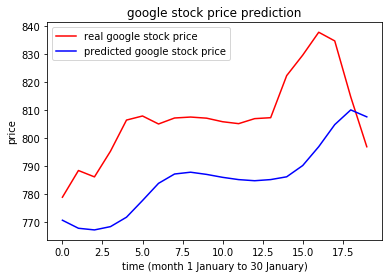

In [61]:
plt.plot(test_set, color = 'red', label = 'real google stock price')
plt.plot(y_pred, color = 'blue', label = 'predicted google stock price')

plt.title('google stock price prediction')
plt.xlabel('time (month 1 January to 30 January)')
plt.ylabel('price')
plt.legend() #we HAVE TO add thid line, so that the "legend" in the plot is added to the image.

In [ ]:
#As seen above, the model lags behind becaue it can not react fast enough to fast, non-linear changes. 
#But it reacts well to smooth changes, and manages to follow the upward and downward trends.